**Linear regression (predicting a continuous value)[CalCOFI: Over 60 years of oceanographic data, Weather in Szeged 2006-2016, Weather Conditions in World War Two]**

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/My Drive/Dataset/bottle.csv')
data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()
print("number of rows : ", data.shape[0])
print("number of rows : ", data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [ ]:
data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [ ]:
data_new=data[['Salnty', 'T_degC']]
data_new.isnull().sum()

data_new.fillna(data_new.mean(),inplace = True)
data_new.isnull().any()

#data_new = data_new.dropna(axis=0, how="any")
#print(data_new.info())
print(data_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  864863 non-null  float64
 1   T_degC  864863 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB
None


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
data_new = data_new[:1000]
data_new.shape
print(data_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  1000 non-null   float64
 1   T_degC  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None


         Salnty   T_degC
Salnty  1.00000 -0.83792
T_degC -0.83792  1.00000


<Figure size 864x720 with 0 Axes>

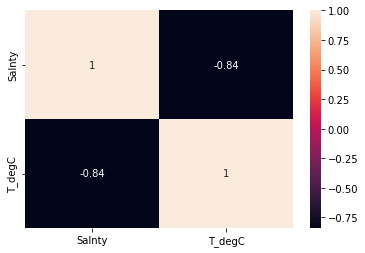

<Figure size 864x720 with 0 Axes>

In [ ]:
print(data_new.corr())
sns.heatmap(data_new.corr(), annot=True)
plt.figure(figsize=(12,10))

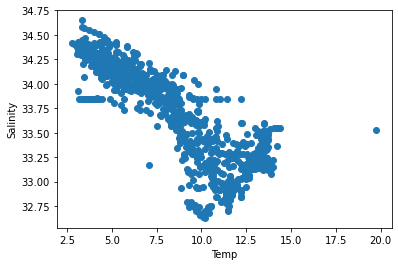

In [ ]:
plt.scatter(data_new['T_degC'],data_new['Salnty'],alpha = 1)
plt.ylabel('Salinity')
plt.xlabel('Temp')
plt.show()

In [ ]:

x = data_new.iloc[:,0].values
y = data_new.iloc[:,1].values
#x=pd.DataFrame(x)
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=50)  
'''
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
'''

'\nfrom sklearn.preprocessing import StandardScaler    \nst_x= StandardScaler()    \nx_train= st_x.fit_transform(x_train)    \nx_test= st_x.transform(x_test)  \n'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_reg = LinearRegression()
model=linear_reg.fit(x_train.reshape(-1,1),y_train)
y_pred = model.predict(x_test.reshape(-1, 1))

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

#r_sq = model.score(y_test, y_pred)
#print(f"coefficient of determination: {r_sq}")


0.6715668757739266


In [ ]:
print(y_test[:10])
print(y_train[:10])

[11.52  6.15  3.66  9.67 13.32  4.63 10.83 10.53  6.44  8.56]
[ 4.19  4.33 12.5  13.26  6.85 10.06  5.38  6.18 13.71  6.61]


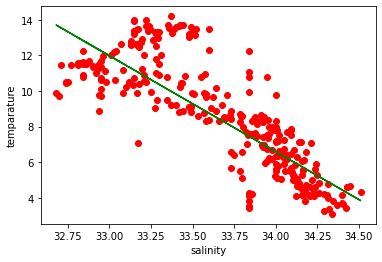

In [ ]:
plt.xlabel("salinity")
plt.ylabel("temparature")
#plt.scatter(x_train, y_train, color='r')
plt.scatter(x_test, y_test, color='r')
plt.plot(x_test , y_pred , color = "green")
plt.show()

Weather dataset

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/My Drive/Dataset/weatherHistory.csv')
#data= pd.read_csv('/content/drive/My Drive/Dataset/weatherHistory2_new - weatherHistory.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


(array([2.2000e+01, 1.0100e+02, 2.1380e+03, 5.3530e+03, 7.1100e+03,
        9.5530e+03, 1.1291e+04, 1.4850e+04, 2.2007e+04, 2.4028e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

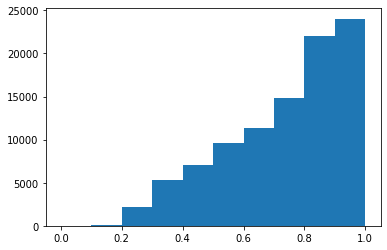

In [ ]:
plt.hist((data['Humidity']))

(array([   48.,   375.,  2725., 12550., 18689., 16321., 23126., 14429.,
         7141.,  1049.]),
 array([-27.71666667, -21.01055556, -14.30444444,  -7.59833333,
         -0.89222222,   5.81388889,  12.52      ,  19.22611111,
         25.93222222,  32.63833333,  39.34444444]),
 <a list of 10 Patch objects>)

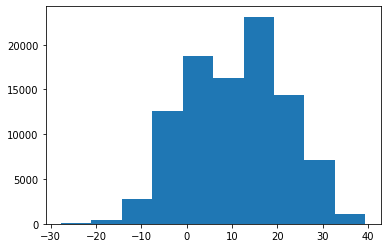

In [ ]:
plt.hist(data['Apparent Temperature (C)'])

(array([   54.,   494.,  3550., 15397., 20497., 20322., 19286., 11334.,
         4833.,   686.]),
 array([-21.82222222, -15.64944444,  -9.47666667,  -3.30388889,
          2.86888889,   9.04166667,  15.21444444,  21.38722222,
         27.56      ,  33.73277778,  39.90555556]),
 <a list of 10 Patch objects>)

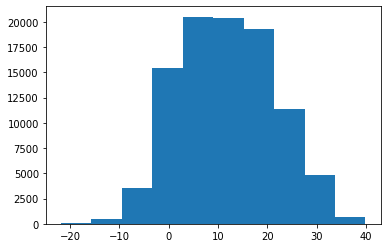

In [ ]:
plt.hist(data['Temperature (C)'])

In [ ]:
data.info()
print("number of rows : ", data.shape[0])
print("number of rows : ", data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
number of rows :  96453
number of rows :  12


In [ ]:
data_new=data[['Humidity', 'Temperature (C)']]
#data_new2=data[['Humidity','Apparent Temperature (C)']]
print(data_new)
data_new.isnull().sum()

data_new.fillna(data_new.mean(),inplace = True)
data_new.isnull().any()

       Humidity  Temperature (C)
0          0.89         9.472222
1          0.86         9.355556
2          0.89         9.377778
3          0.83         8.288889
4          0.83         8.755556
...         ...              ...
96448      0.43        26.016667
96449      0.48        24.583333
96450      0.56        22.038889
96451      0.60        21.522222
96452      0.61        20.438889

[96453 rows x 2 columns]


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Humidity           False
Temperature (C)    False
dtype: bool

                 Humidity  Temperature (C)
Humidity         1.000000        -0.779479
Temperature (C) -0.779479         1.000000


<Figure size 864x720 with 0 Axes>

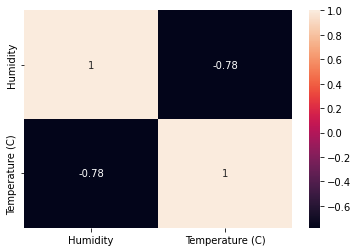

<Figure size 864x720 with 0 Axes>

In [ ]:

data_new= data_new[:500]
print(data_new.corr())
sns.heatmap(data_new.corr(), annot=True)
plt.figure(figsize=(12,10))


                          Humidity  Apparent Temperature (C)
Humidity                  1.000000                 -0.736619
Apparent Temperature (C) -0.736619                  1.000000


<Figure size 864x720 with 0 Axes>

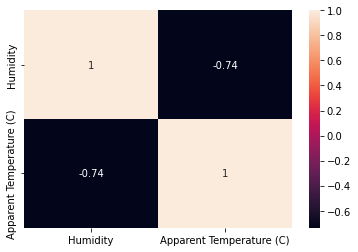

<Figure size 864x720 with 0 Axes>

In [ ]:
data_new2=data[['Humidity','Apparent Temperature (C)']]
data_new2= data_new2[:500]
print(data_new2.corr())
sns.heatmap(data_new2.corr(), annot=True)
plt.figure(figsize=(12,10))


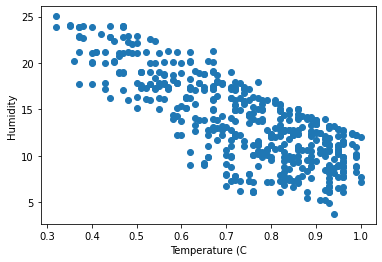

In [ ]:
plt.scatter(data_new['Humidity'],data_new['Temperature (C)'],alpha = 1)
plt.ylabel('Humidity')
plt.xlabel('Temperature (C')
plt.show()

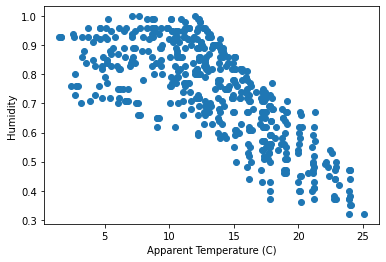

In [ ]:

plt.scatter(data_new2['Apparent Temperature (C)'],data_new2['Humidity'],alpha = 1)
plt.ylabel('Humidity')
plt.xlabel('Apparent Temperature (C)')
plt.show()


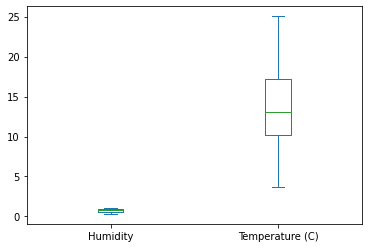

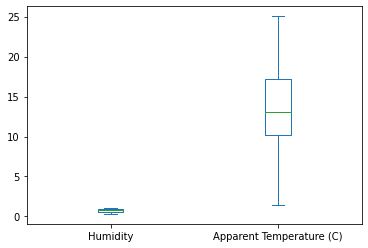

In [ ]:
#sns.boxplot(y=data_new['Humidity']);
data_new.plot(kind='box');
data_new2.plot(kind='box');

In [ ]:
'''
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_reg = LinearRegression()
model=linear_reg.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
'''

'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn import metrics\n\nlinear_reg = LinearRegression()\nmodel=linear_reg.fit(x_train,y_train)\ny_pred = model.predict(x_test)\n\nfrom sklearn.metrics import r2_score\nprint(r2_score(y_test, y_pred))\n'

In [ ]:
x = data.iloc[:,4].values
y = data.iloc[:,5].values

x=pd.DataFrame(x)

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30)  

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_reg = LinearRegression()
model=linear_reg.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
print('R2SCORE is %f' % metrics.r2_score(y_test, y_pred))

0.3648783015533291
R2SCORE is 0.364878


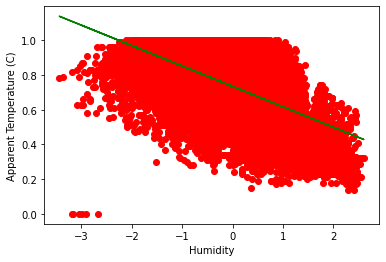

In [ ]:
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature (C)")
#plt.scatter(x_train, y_train, color='r')
plt.scatter(x_test, y_test, color='r')
plt.plot(x_test , y_pred , color = "green")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
print(mean_absolute_error(y_test,y_pred).round(5))
print(mean_squared_error(y_test,y_pred).round(5))
print(nm.sqrt(mean_squared_error(y_test,y_pred)).round(5))



0.12704
0.02442
0.15628


Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


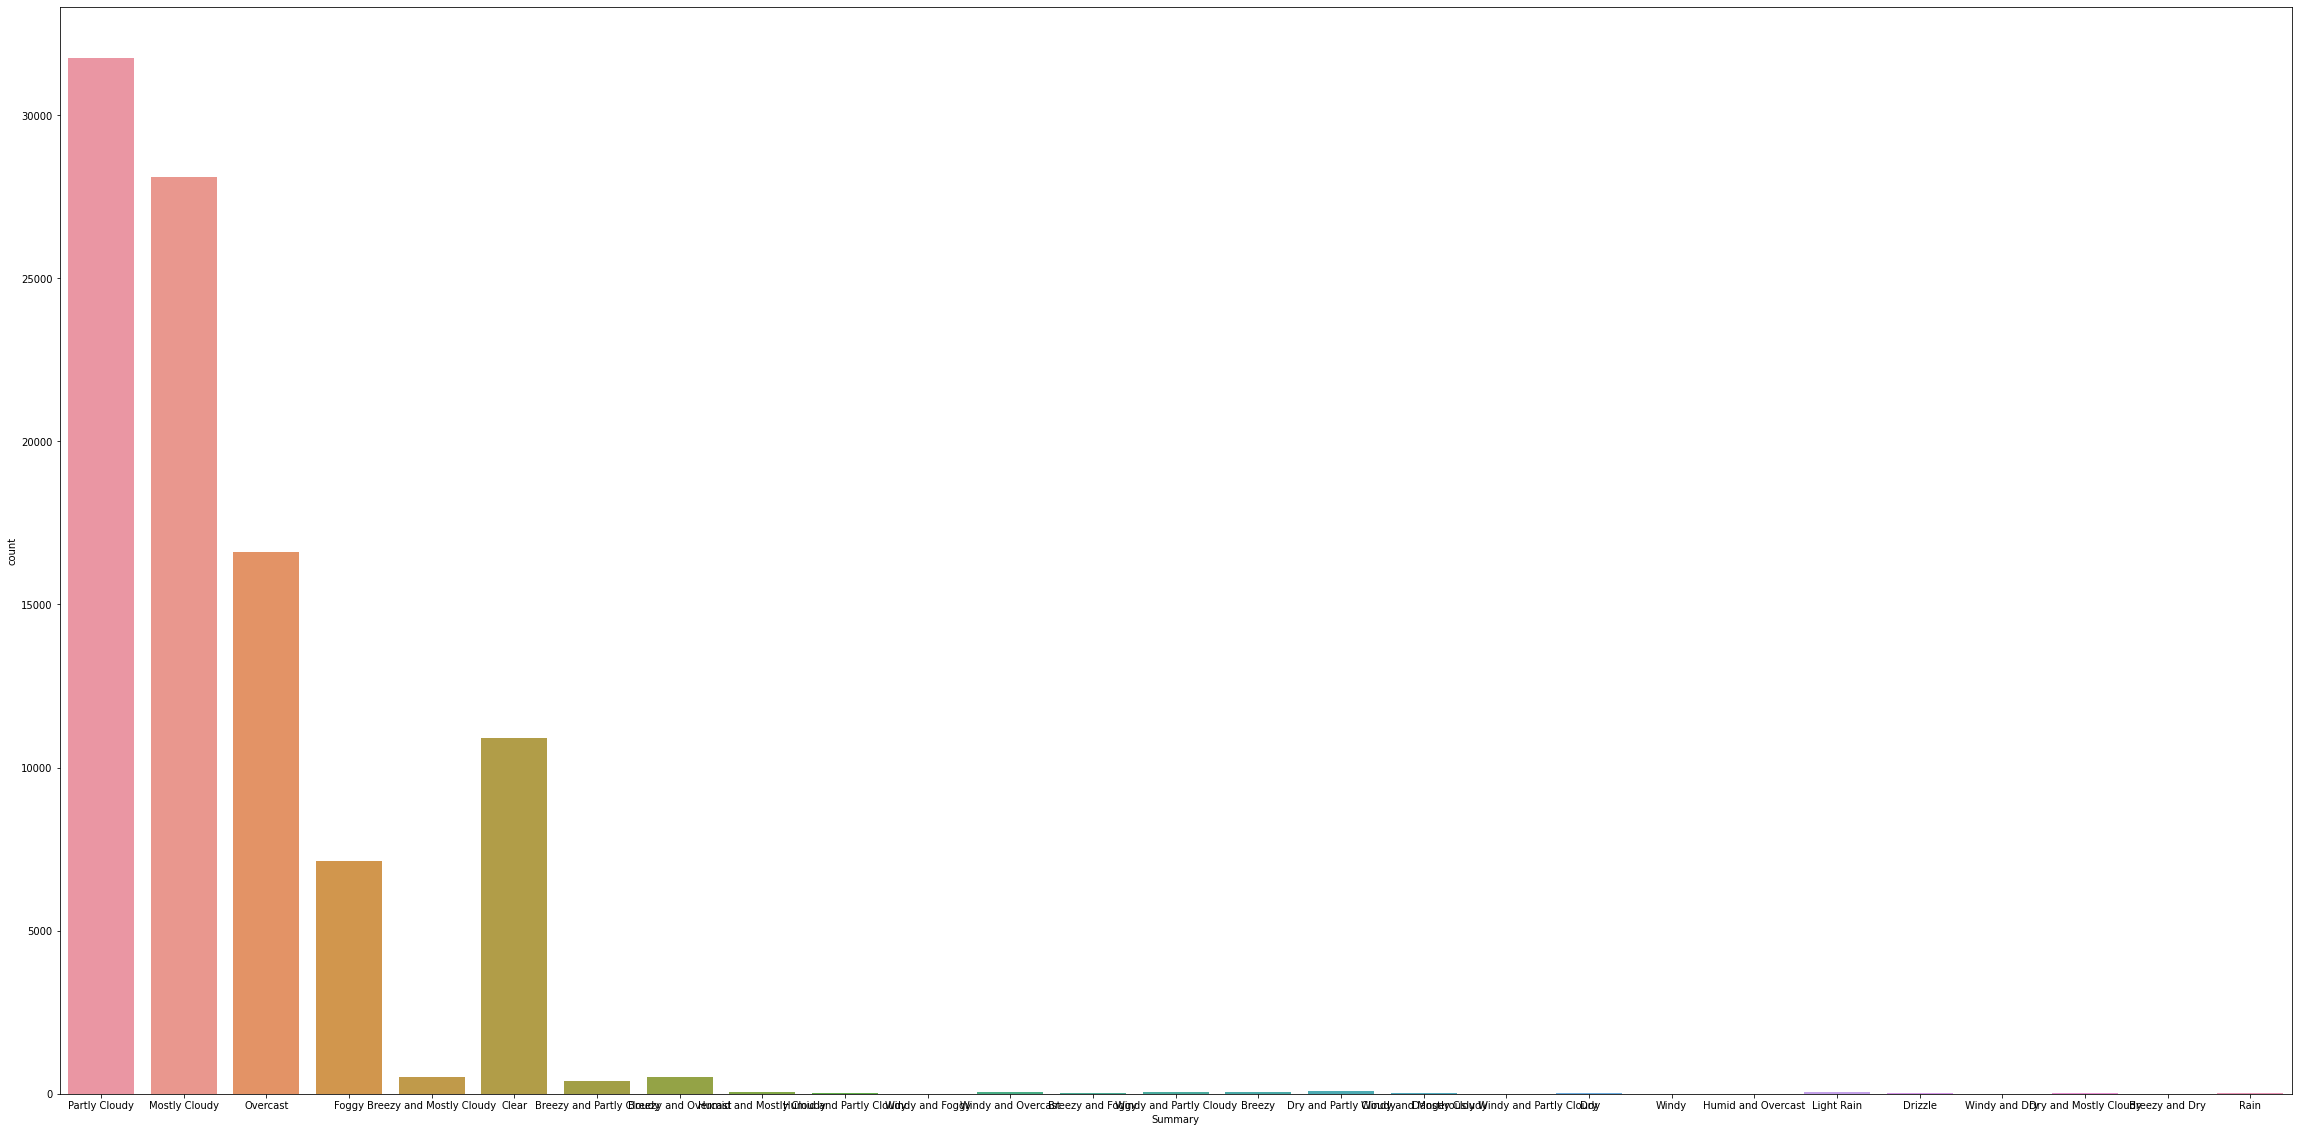

In [ ]:
#print(data['Precip Type'].value_counts())
print(data['Summary'].value_counts())
plt.figure(figsize=(40,20))
sns.countplot(data['Summary'])
plt.show()

Weather condition World war

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
#data= pd.read_csv('/content/drive/My Drive/Dataset/weatherHistory.csv')
data1= pd.read_csv('/content/drive/My Drive/Dataset/Summary_of_ Weather.csv')
data1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

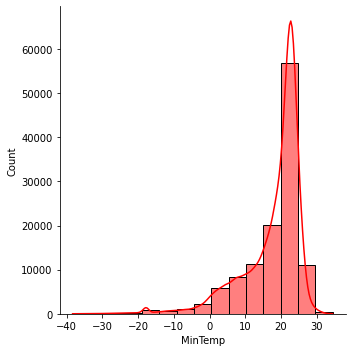

In [ ]:
sns.displot(data=data1 ,x='MinTemp',kde = True, color ='red', bins = 15 )

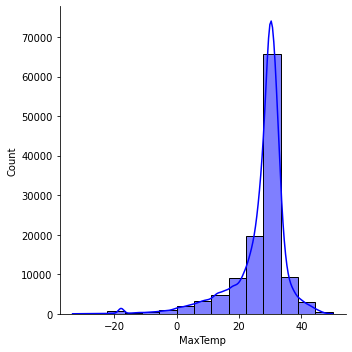

In [ ]:
sns.displot(data=data1 ,x='MaxTemp',kde = True, color ='blue', bins = 15 )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


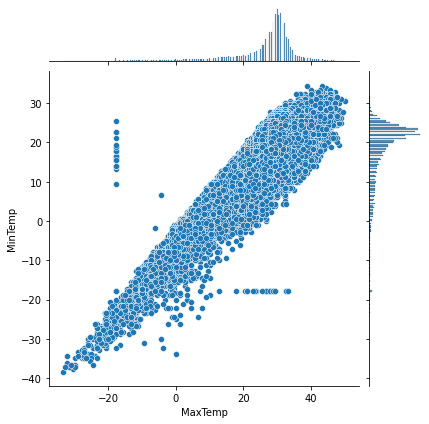

In [ ]:
sns.jointplot('MaxTemp','MinTemp',data=data1)

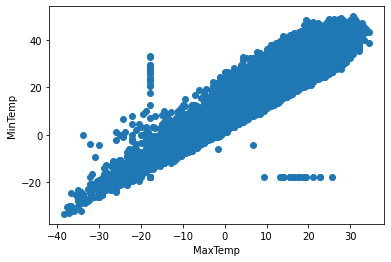

In [ ]:
#data=data[:10000]
x=data1[['MinTemp']]
y=data1[['MaxTemp']]
plt.scatter(x,y,alpha = 1)

plt.ylabel('MinTemp')
plt.xlabel('MaxTemp')
plt.show()

In [ ]:
x = data1.iloc[:,4].values
y = data1.iloc[:,5].values

x=pd.DataFrame(x)

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  
'''
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
'''
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear_reg = LinearRegression()
model=linear_reg.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import r2_score
from sklearn import metrics
print(r2_score(y_test, y_pred))
print('R2SCORE is %f' % metrics.r2_score(y_test, y_pred))


0.7670690838694038
R2SCORE is 0.767069


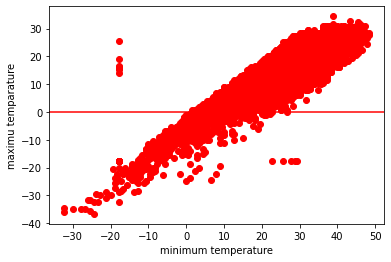

In [ ]:
plt.xlabel("minimum temperature")
plt.ylabel("maximu temparature")
#plt.scatter(x_train, y_train, color='r')
plt.scatter(x_test,y_test,color='r')
#plt.plot(x_test,y_pred,color = "green")
plt.axhline(color='r')
plt.show()

[ 5.65117618 -0.10340402 -0.72733311 ...  2.67437376  0.45215154
 -3.10096564]


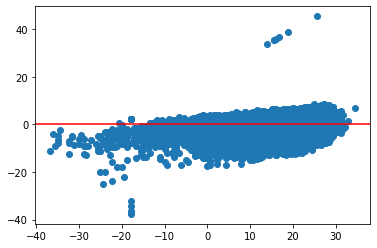

In [ ]:
test_residuals=y_test-y_pred
print(test_residuals)
plt.scatter(y_test , test_residuals)
plt.axhline(color='r')